In [1]:
#Tasks - Module 6 -- Time Series Analysis

#Loading necessary packages

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import Series
import statsmodels.api as sm
from scipy import stats
from matplotlib.dates import DateFormatter
import scipy.stats as scp
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Task 1

#Reading in the necessary dataset

earnings = pd.read_csv("earnings.csv", header=None, parse_dates=True, dayfirst=True)

earnings.columns = ['Earnings','Time']

earnings.head()

,Earnings,Time
0,542.4,1/11/94
1,555.4,1/11/95
2,570.6,1/11/96
3,592.6,1/11/97
4,603.4,1/11/98


In [3]:
#Converting Time column to Datetime64 type
earnings['Time']=pd.to_datetime(earnings['Time'], format='%d/%m/%y')

earnings.dtypes

Earnings           float64
Time        datetime64[ns]
dtype: object

In [4]:
#Setting the index of the dataframe to the Time column
earnings.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


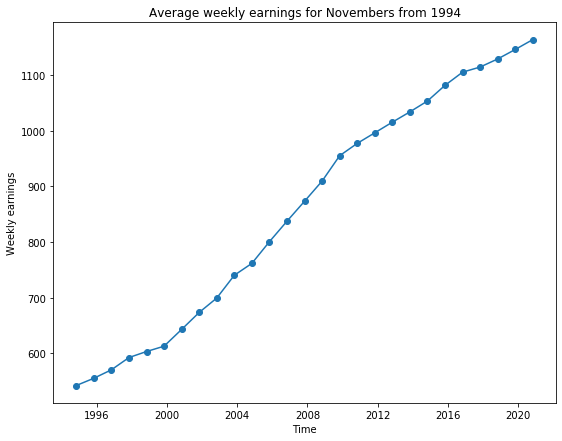

In [5]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(earnings.index.values, earnings['Earnings'],'-o')
ax.set(xlabel="Time",ylabel="Weekly earnings",title="Average weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, no seasonality, no intervention, and no changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

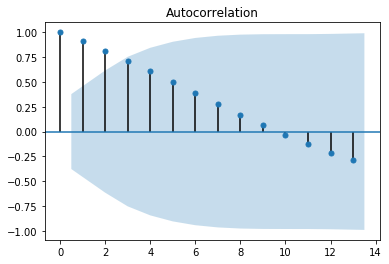

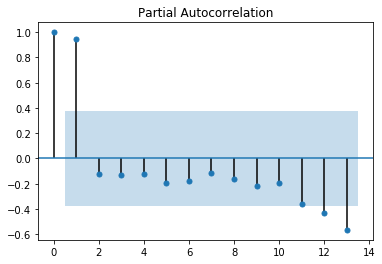

In [6]:
#Creating the ACF and PACF plots of the earnings series

sm.graphics.tsa.plot_acf(earnings.Earnings, lags=13);
sm.graphics.tsa.plot_pacf(earnings.Earnings, lags=13);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [7]:
#Transforming the series

earnings_transformed, lambda_= stats.boxcox(earnings.Earnings) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

earnings_transformed = pd.DataFrame(earnings_transformed)

#Setting the index of the data frame
earnings_transformed.index=earnings.index

earnings_transformed.columns = ['earnings_transformed']

earnings_transformed.head()

# The lambda value is different from the one seen in R and 
# there is no known option with stats.boxcox to change the method to yule-walker etc

lambda= 0.8768858723423517


,earnings_transformed
Time,
1994-11-01,283.792912
1995-11-01,289.772544
1996-11-01,296.742322
1997-11-01,306.789913
1998-11-01,311.705478


In [8]:
#Taking the first difference of the transformed earnings series

differenced_earnings = pd.DataFrame(Series.diff(earnings_transformed['earnings_transformed'], 1))

differenced_earnings.columns = ['differenced_earnings']

differenced_earnings.head()

,differenced_earnings
Time,
1994-11-01,NaN
1995-11-01,5.979632
1996-11-01,6.969778
1997-11-01,10.047591
1998-11-01,4.915565


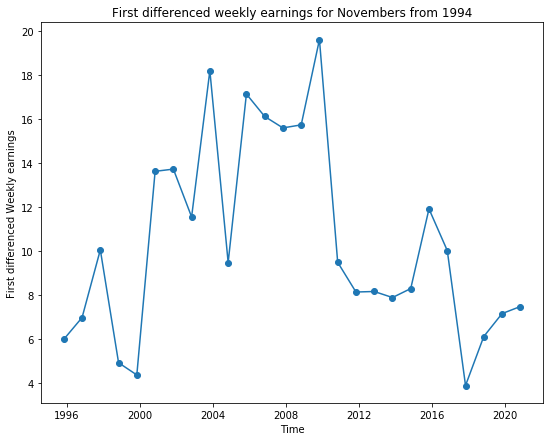

In [9]:
#Plotting the first differenced earnings time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_earnings.index.values, differenced_earnings['differenced_earnings'],'-o')
ax.set(xlabel="Time",ylabel="First differenced Weekly earnings",title="First differenced weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in the series

In [10]:
#Getting the lag order of the differenced transformed series

#There seems to be no known way to get the lag order. Further, the usual adf test method does not have option to input
#the lag order.

#Proceeding with the usual adf test method available for python

In [11]:
#Removing the first NA value
differenced_earnings_clean = differenced_earnings.iloc[1:]

differenced_earnings_clean.head()

,differenced_earnings
Time,
1995-11-01,5.979632
1996-11-01,6.969778
1997-11-01,10.047591
1998-11-01,4.915565
1999-11-01,4.360300


In [12]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_earnings_clean.differenced_earnings)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.0502 that the series is still non-stationary at 5% level of significance.
# So we will apply the second differencing.

(-2.8599227581967885, 0.050210869194868106, 9, 16, {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}, 88.50075001343512)
ADF Statistic:           -2.859923
p-value:                 0.050211


In [13]:
#Taking the second difference of the transformed earnings series

differenced2_earnings = pd.DataFrame(Series.diff(earnings_transformed['earnings_transformed'], 2))

differenced2_earnings.columns = ['differenced2_earnings']

differenced2_earnings.head()

,differenced2_earnings
Time,
1994-11-01,NaN
1995-11-01,NaN
1996-11-01,12.949410
1997-11-01,17.017369
1998-11-01,14.963156


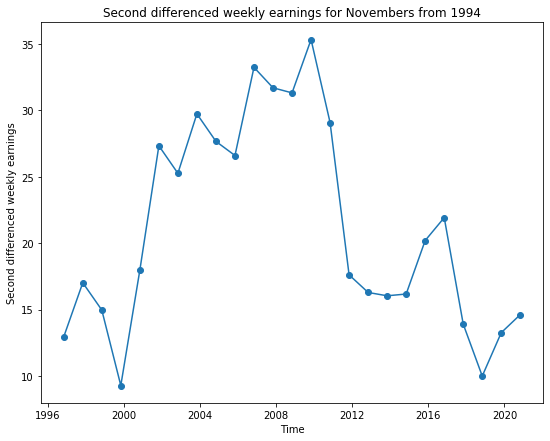

In [14]:
#Plotting the second differenced earnings time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced2_earnings.index.values, differenced2_earnings['differenced2_earnings'],'-o')
ax.set(xlabel="Time",ylabel="Second differenced weekly earnings",title="Second differenced weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There seems to be no trend in the series

In [15]:
#Removing the first two NA values
differenced2_earnings_clean = differenced2_earnings.iloc[2:]

differenced2_earnings_clean.head()

,differenced2_earnings
Time,
1996-11-01,12.949410
1997-11-01,17.017369
1998-11-01,14.963156
1999-11-01,9.275865
2000-11-01,17.977871


In [16]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced2_earnings_clean.differenced2_earnings)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.021 that the series is now stationary at 5% level of significance 
# with the second differcing. Note: This is different from the R result where second differencing is not enough to 
# bring stationarity to the series.

(-3.1808027086255115, 0.02112313409570123, 9, 15, {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}, 70.82025793726709)
ADF Statistic:           -3.180803
p-value:                 0.021123


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


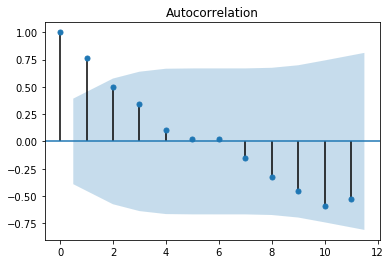

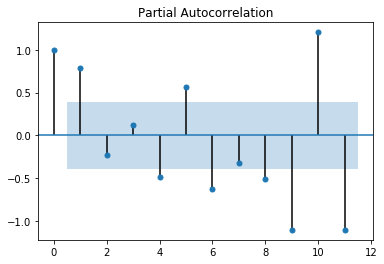

In [17]:
#Creating the ACF and PACF plots of the second differenced earnings series

sm.graphics.tsa.plot_acf(differenced2_earnings_clean.differenced2_earnings, lags=11);
sm.graphics.tsa.plot_pacf(differenced2_earnings_clean.differenced2_earnings, lags=11);

# There is one highly significant lag in ACF and one highly significant lag in PACF (among the first few lags).
# So we can include ARIMA(2,2,1) models among the candidate models.

# This result is slightly different to the one obtained in R.

In [18]:
#There is no method to produce EACF plot in Python

In [19]:
#There is no method to produce the BIC plot in Python

In [20]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

In [21]:
#The candidate model found using ACF and PACF plot is ARIMA (2,2,1)

#The final set of possible models is {ARIMA(0,2,1),ARIMA(1,2,1), ARIMA(2,2,1), ARIMA(2,2,0)}

In [22]:
#Fitting ARIMA (0,2,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(0,2,1))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar1 = model_fit1.k_ar
ma1 = model_fit1.k_ma
AIC1 = model_fit1.aic
BIC1 = model_fit1.bic

#Creating a dataframe to hold the results
col_names =  ['p', 'q', 'AIC','BIC']
order_aic_bic1 = pd.DataFrame(columns = col_names)
order_aic_bic1.loc[len(order_aic_bic1)] = [ar1, ma1, AIC1, BIC1]

order_aic_bic1

                                ARIMA Model Results                                
Dep. Variable:     D2.earnings_transformed   No. Observations:                   25
Model:                      ARIMA(0, 2, 1)   Log Likelihood                 -69.819
Method:                            css-mle   S.D. of innovations              3.929
Date:                     Mon, 20 Jan 2020   AIC                            145.638
Time:                             21:12:02   BIC                            149.295
Sample:                         11-01-1996   HQIC                           146.653
                              - 11-01-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0141      0.416      0.034      0.973      -0.801       0.829
ma.L1.D2.earnings_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,145.638334,149.294962


In [23]:
#Fitting ARIMA (1,2,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(1,2,1))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar2 = model_fit2.k_ar
ma2 = model_fit2.k_ma
AIC2 = model_fit2.aic
BIC2 = model_fit2.bic

#Adding the record to the existing dataframe
order_aic_bic1.loc[len(order_aic_bic1)] = [ar2, ma2, AIC2, BIC2]

order_aic_bic1

                                ARIMA Model Results                                
Dep. Variable:     D2.earnings_transformed   No. Observations:                   25
Model:                      ARIMA(1, 2, 1)   Log Likelihood                 -69.818
Method:                            css-mle   S.D. of innovations              3.928
Date:                     Mon, 20 Jan 2020   AIC                            147.636
Time:                             21:12:02   BIC                            152.512
Sample:                         11-01-1996   HQIC                           148.988
                              - 11-01-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0146      0.418      0.035      0.972      -0.805       0.834
ar.L1.D2.earnings_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,145.638334,149.294962
1,1.0,1.0,147.636238,152.511741


In [24]:
#Fitting ARIMA (2,2,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,2,1))
model_fit3 = model.fit(disp=0)
print(model_fit3.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar3 = model_fit3.k_ar
ma3 = model_fit3.k_ma
AIC3 = model_fit3.aic
BIC3 = model_fit3.bic

#Adding the record to the existing dataframe
order_aic_bic1.loc[len(order_aic_bic1)] = [ar3, ma3, AIC3, BIC3]

order_aic_bic1

                                ARIMA Model Results                                
Dep. Variable:     D2.earnings_transformed   No. Observations:                   25
Model:                      ARIMA(2, 2, 1)   Log Likelihood                 -69.600
Method:                            css-mle   S.D. of innovations              3.891
Date:                     Mon, 20 Jan 2020   AIC                            149.201
Time:                             21:12:02   BIC                            155.295
Sample:                         11-01-1996   HQIC                           150.891
                              - 11-01-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0129      0.457      0.028      0.978      -0.883       0.909
ar.L1.D2.earnings_transformed    -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,145.638334,149.294962
1,1.0,1.0,147.636238,152.511741
2,2.0,1.0,149.200679,155.295058


In [25]:
#Fitting ARIMA(2,2,0)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,2,0))
model_fit4 = model.fit(disp=0)
print(model_fit4.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar4 = model_fit4.k_ar
ma4 = model_fit4.k_ma
AIC4 = model_fit4.aic
BIC4 = model_fit4.bic

#Adding the record to the existing dataframe
order_aic_bic1.loc[len(order_aic_bic1)] = [ar4, ma4, AIC4, BIC4]

order_aic_bic1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D2.earnings_transformed   No. Observations:                   25
Model:                      ARIMA(2, 2, 0)   Log Likelihood                 -69.602
Method:                            css-mle   S.D. of innovations              3.892
Date:                     Mon, 20 Jan 2020   AIC                            147.204
Time:                             21:12:02   BIC                            152.080
Sample:                         11-01-1996   HQIC                           148.556
                              - 11-01-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0120      0.453      0.027      0.979      -0.875       0.900
ar.L1.D2.earnings_transformed    -

,p,q,AIC,BIC
0,0.0,1.0,145.638334,149.294962
1,1.0,1.0,147.636238,152.511741
2,2.0,1.0,149.200679,155.295058
3,2.0,0.0,147.204129,152.079632


In [26]:
#The model with all coefficients significant is ARIMA (0,2,1) i.e IMA(2,1)

In [27]:
#Sorting the results by AIC and BIC scores

# Sort by AIC
print(order_aic_bic1.sort_values('AIC'))

# Sort by BIC
print(order_aic_bic1.sort_values('BIC'))

#The best model according to both AIC and BIC is ARIMA (0,2,1)

     p    q         AIC         BIC
0  0.0  1.0  145.638334  149.294962
3  2.0  0.0  147.204129  152.079632
1  1.0  1.0  147.636238  152.511741
2  2.0  1.0  149.200679  155.295058
     p    q         AIC         BIC
0  0.0  1.0  145.638334  149.294962
3  2.0  0.0  147.204129  152.079632
1  1.0  1.0  147.636238  152.511741
2  2.0  1.0  149.200679  155.295058


In [28]:
#Checking an over-fitting model ARIMA (0,2,2)

#Fitting ARIMA (0,2,2)

model = ARIMA(earnings_transformed.earnings_transformed, order=(0,2,2))
model_fit4 = model.fit(disp=0)
print(model_fit4.summary()) #Equivalent of coeftest function in R to display the model results

# Here, MA(2) component is also insignificant. So we can confirm that ARIMA(0,2,1) model is a suitable specification.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D2.earnings_transformed   No. Observations:                   25
Model:                      ARIMA(0, 2, 2)   Log Likelihood                 -69.818
Method:                            css-mle   S.D. of innovations              3.928
Date:                     Mon, 20 Jan 2020   AIC                            147.635
Time:                             21:12:02   BIC                            152.511
Sample:                         11-01-1996   HQIC                           148.987
                              - 11-01-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0148      0.419      0.035      0.972      -0.807       0.836
ma.L1.D2.earnings_transformed    -

In [29]:
#Task 2

#Reading in the necessary data
data_cash = pd.read_csv("data.cash.csv", header=None)

#Renaming the columns
data_cash.columns = ['Year','Cash']

data_cash['Year'] = pd.to_datetime(data_cash['Year'], format='%Y')

data_cash.head()

,Year,Cash
0,1994-01-01,3664.750000
1,1995-01-01,3920.500000
2,1996-01-01,4259.500000
3,1997-01-01,4933.333333
4,1998-01-01,5530.000000


In [30]:
#Setting the index of the dataframe to the Year column

data_cash.set_index('Year', inplace=True)
#There is no need to convert the column to ts object as in R

[Text(0, 0.5, 'Cash values of withdrawals'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yearly average of ATM Cash Withdrawals from 1994 to 2016')]

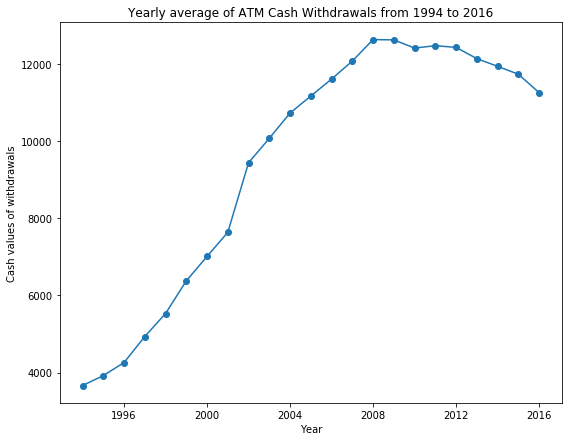

In [31]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_cash.index.values, data_cash['Cash'],'-o')
ax.set(xlabel="Year",ylabel="Cash values of withdrawals",title="Yearly average of ATM Cash Withdrawals from 1994 to 2016")


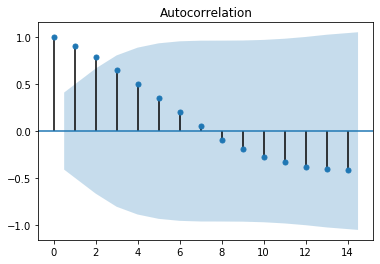

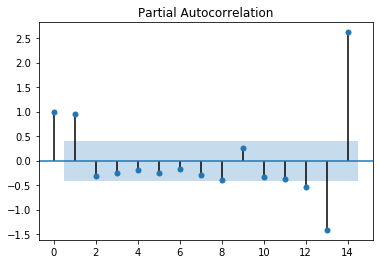

In [32]:
#Creating the ACF and PACF plots

sm.graphics.tsa.plot_acf(data_cash.Cash);
sm.graphics.tsa.plot_pacf(data_cash.Cash);

In [33]:
#Transforming the series

data_cash_transformed, lambda_= stats.boxcox(data_cash.Cash) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

data_cash_transformed = pd.DataFrame(data_cash_transformed)

#Setting the index of the data frame
data_cash_transformed.index=data_cash.index

data_cash_transformed.columns = ['Cash']

data_cash_transformed.head()

#The lambda value here is different from the lambda value from R

lambda= 1.948708349735878


,Cash
Year,
1994-01-01,4.524141e+06
1995-01-01,5.159738e+06
1996-01-01,6.064773e+06
1997-01-01,8.074335e+06
1998-01-01,1.008632e+07


In [34]:
#Taking the first difference of the series

data_cash_differenced = Series.diff(data_cash_transformed, 1)

data_cash_differenced.columns = ['Cash']

data_cash_differenced.head()

,Cash
Year,
1994-01-01,NaN
1995-01-01,6.355970e+05
1996-01-01,9.050357e+05
1997-01-01,2.009562e+06
1998-01-01,2.011987e+06


[Text(0, 0.5, 'Transformed and differenced cash values of withdrawals'),
 Text(0.5, 0, 'Year')]

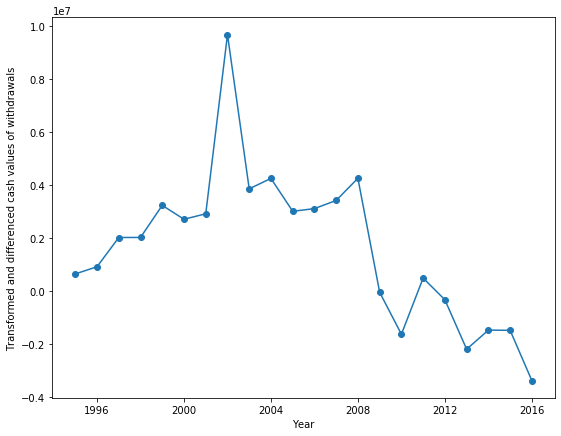

In [35]:
#Plotting the first differenced data series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_cash_differenced.index.values, data_cash_differenced['Cash'],'-o')
ax.set(xlabel="Year",ylabel="Transformed and differenced cash values of withdrawals")

In [36]:
#Removing the first NA value for use with ADF test and ACF and PACF plots

data_cash_differenced_clean = data_cash_differenced.iloc[1:]

data_cash_differenced_clean.head()

,Cash
Year,
1995-01-01,6.355970e+05
1996-01-01,9.050357e+05
1997-01-01,2.009562e+06
1998-01-01,2.011987e+06
1999-01-01,3.222906e+06


In [37]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(data_cash_differenced_clean.Cash)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# With a p-value of 0.000, we can reject the null hypothesis stating that
# the series is non-stationary. Hence, the first differencing brings stationarity.

(-4.362043943079384, 0.0003462680296090823, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, 344.7791374846416)
ADF Statistic:           -4.362044
p-value:                 0.000346


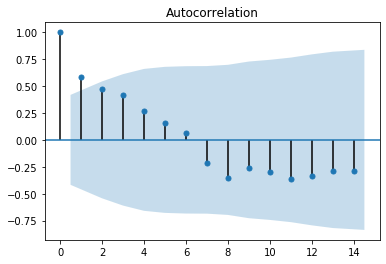

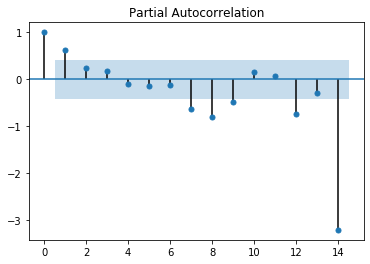

In [38]:
#Creating the ACF and PACF plots of the differenced cash series

sm.graphics.tsa.plot_acf(data_cash_differenced_clean.Cash);
sm.graphics.tsa.plot_pacf(data_cash_differenced_clean.Cash);

# There is one significant lag in ACF and one significant lag in PACF plot as well,
# hence, ARIMA (1,1,1) is a candidate model.

In [39]:
#There is no method to produce EACF plot in Python

In [40]:
#There is no method to produce the BIC plot in Python

In [41]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

In [42]:
#The candidate model found using ACF and PACF plot is ARIMA (1,1,1)

#The final set of possible models is {ARIMA(0,1,1),ARIMA(1,1,0), ARIMA(1,1,1)}

In [43]:
#Fitting ARIMA (0,1,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(0,1,1))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar1 = model_fit1.k_ar
ma1 = model_fit1.k_ma
AIC1 = model_fit1.aic
BIC1 = model_fit1.bic

#Creating a dataframe to hold the results
col_names =  ['p', 'q', 'AIC','BIC']
order_aic_bic2 = pd.DataFrame(columns = col_names)
order_aic_bic2.loc[len(order_aic_bic2)] = [ar1, ma1, AIC1, BIC1]

order_aic_bic2

                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(0, 1, 1)   Log Likelihood                 -72.883
Method:                           css-mle   S.D. of innovations              3.979
Date:                    Mon, 20 Jan 2020   AIC                            151.766
Time:                            21:12:03   BIC                            155.541
Sample:                        11-01-1995   HQIC                           152.853
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.3679      1.072      9.671      0.000       8.267      12.469
ma.L1.D.earnings_transformed     0.3882      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,151.766381,155.54067


In [44]:
#Fitting ARIMA (1,1,0)

model = ARIMA(earnings_transformed.earnings_transformed, order=(1,1,0))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar2 = model_fit2.k_ar
ma2 = model_fit2.k_ma
AIC2 = model_fit2.aic
BIC2 = model_fit2.bic

#Adding the record to the existing dataframe
order_aic_bic2.loc[len(order_aic_bic2)] = [ar2, ma2, AIC2, BIC2]

order_aic_bic2

                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(1, 1, 0)   Log Likelihood                 -71.796
Method:                           css-mle   S.D. of innovations              3.807
Date:                    Mon, 20 Jan 2020   AIC                            149.592
Time:                            21:12:03   BIC                            153.367
Sample:                        11-01-1995   HQIC                           150.679
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.1763      1.446      7.035      0.000       7.341      13.011
ar.L1.D.earnings_transformed     0.4992      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,151.766381,155.540670
1,1.0,0.0,149.592363,152.511741


In [45]:
#Fitting ARIMA (1,1,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(1,1,1))
model_fit3 = model.fit(disp=0)
print(model_fit3.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar3 = model_fit3.k_ar
ma3 = model_fit3.k_ma
AIC3 = model_fit3.aic
BIC3 = model_fit3.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar3, ma3, AIC3, BIC3]

order_aic_bic3

                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 -71.236
Method:                           css-mle   S.D. of innovations              3.719
Date:                    Mon, 20 Jan 2020   AIC                            150.472
Time:                            21:12:03   BIC                            155.505
Sample:                        11-01-1995   HQIC                           151.921
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.8182      1.918      5.119      0.000       6.059      13.577
ar.L1.D.earnings_transformed     0.7690      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,0.0,1.0,151.766381,155.540670
1,1.0,0.0,149.592363,152.511741
2,1.0,1.0,150.472148,155.504534


In [46]:
#The models with all coefficients significant are ARIMA (0,1,1) and ARIMA (1,1,0)

In [47]:
#Sorting the results by AIC and BIC scores

# Sort by AIC
print(order_aic_bic2.sort_values('AIC'))

# Sort by BIC
print(order_aic_bic2.sort_values('BIC'))

#The best model according to both AIC and BIC is ARIMA (1,1,0)

     p    q         AIC         BIC
1  1.0  0.0  149.592363  152.511741
2  1.0  1.0  150.472148  155.504534
0  0.0  1.0  151.766381  155.540670
     p    q         AIC         BIC
1  1.0  0.0  149.592363  152.511741
2  1.0  1.0  150.472148  155.504534
0  0.0  1.0  151.766381  155.540670


In [48]:
#Checking over-fitting models: ARIMA (2,1,0) and ARIMA (1,1,1) - ARIMA (1,1,1) has been attempted before and not considered.

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,1,0))
model_fit4 = model.fit(disp=0)
print(model_fit4.summary()) #Equivalent of coeftest function in R to display the model results

# Here, AR(2) component is insignificant. So we can conclude that ARIMA(1,1,0) model has suitable specification.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(2, 1, 0)   Log Likelihood                 -71.353
Method:                           css-mle   S.D. of innovations              3.738
Date:                    Mon, 20 Jan 2020   AIC                            150.706
Time:                            21:12:03   BIC                            155.738
Sample:                        11-01-1995   HQIC                           152.155
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.9748      1.720      5.799      0.000       6.603      13.346
ar.L1.D.earnings_transformed     0.4109      

In [49]:
#Task 3

#Reading in the necessary dataset
data_sim = pd.read_csv("data.sim.csv", header=None)

#Renaming columns
data_sim.columns = ['Sim','Time']

data_sim.head()

,Sim,Time
0,0.000000,1
1,-0.398143,2
2,-2.317668,3
3,-1.094310,4
4,-1.195734,5


In [50]:
#Setting the index of the dataframe to the Time column

data_sim.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

[Text(0, 0.5, 'Simulated series'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Simulated series')]

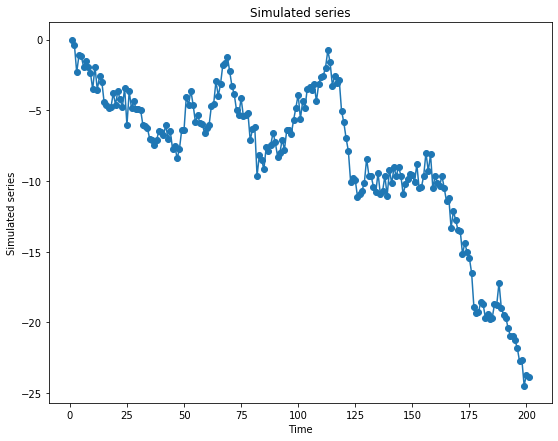

In [51]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_sim.index.values, data_sim['Sim'],'-o')
ax.set(xlabel="Time",ylabel="Simulated series",title="Simulated series")

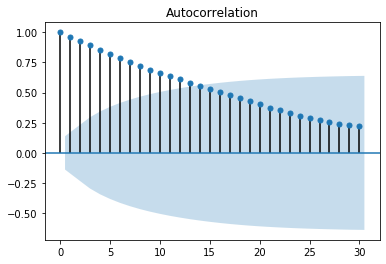

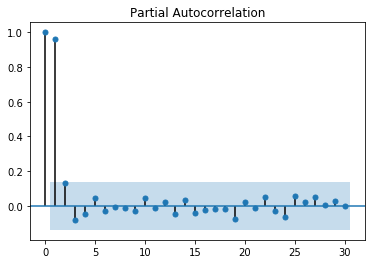

In [52]:
#Creating the ACF and PACF plots of the simulated series

sm.graphics.tsa.plot_acf(data_sim.Sim, lags=30);
sm.graphics.tsa.plot_pacf(data_sim.Sim, lags=30);

In [53]:
#Adding 0.1 to the minimum value of the series to make it all positive

data_sim['Sim'] = data_sim['Sim']+abs(data_sim['Sim'].min())+0.1 

data_sim.head()

,Sim
Time,
1,24.558687
2,24.160544
3,22.241019
4,23.464378
5,23.362953


In [54]:
#Transforming the series

transformed_sim, lambda_= stats.boxcox(data_sim['Sim']) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

transformed_sim = pd.DataFrame(transformed_sim)

#Setting the index of the data frame
transformed_sim.index=data_sim.index

transformed_sim.columns = ['Transformed_Sim']

transformed_sim

# The lambda value here is different from the lambda value found in R
# there is no known option with stats.boxcox to change the method to yule-walker etc

lambda= 1.7095198971573617


,Transformed_Sim
Time,
1,138.637470
2,134.801207
3,116.935528
4,128.200658
5,127.250473
...,...
197,1.020086
198,1.223354
199,-0.573541


In [55]:
#Taking the first difference of the transformed sim series

differenced_sim = pd.DataFrame(Series.diff(transformed_sim.Transformed_Sim, 1))

differenced_sim.columns = ['Differenced_Sim']

differenced_sim.head()

,Differenced_Sim
Time,
1,NaN
2,-3.836263
3,-17.865679
4,11.265130
5,-0.950185


[Text(0, 0.5, 'Differenced Simulated series'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Differenced Simulated series')]

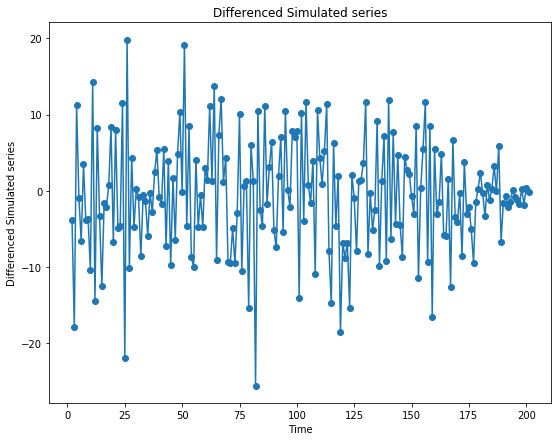

In [56]:
#Plotting the first differenced sim series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_sim.index.values, differenced_sim['Differenced_Sim'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Simulated series",title="Differenced Simulated series")

In [57]:
#Removing the first NA value for use with ADF test and ACF and PACF plots
differenced_sim_clean = differenced_sim.iloc[1:]

differenced_sim_clean.head()

,Differenced_Sim
Time,
2,-3.836263
3,-17.865679
4,11.265130
5,-0.950185
6,-6.573129


In [58]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_sim_clean.Differenced_Sim)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# With a p-value of 0.000, we can reject the null hypothesis stating that
# the series is non-stationary. Hence, the first differencing brings stationarity.

(-6.577153647943234, 7.674455625931336e-09, 3, 196, {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}, 1231.1835278160745)
ADF Statistic:           -6.577154
p-value:                 0.000000


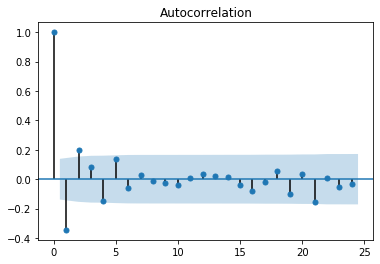

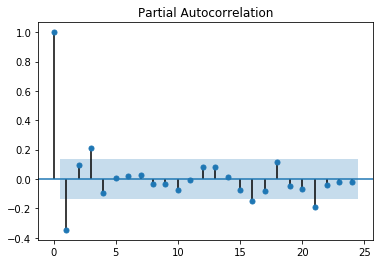

In [59]:
#Creating the ACF and PACF plots of the first differenced simulated series

sm.graphics.tsa.plot_acf(differenced_sim_clean.Differenced_Sim);
sm.graphics.tsa.plot_pacf(differenced_sim_clean.Differenced_Sim);

# There are two/three significant lags in ACF and two significant lags in PACF plot,
# hence, ARIMA (2,1,2) and ARIMA (2,1,3) are candidate models.

# This is slightly different from the candidate models obtained in R solution

In [60]:
#There is no method to produce EACF plot in Python

In [61]:
#There is no method to produce the BIC plot in Python

In [62]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

In [63]:
#The candidate model found using ACF and PACF plot are ARIMA (2,1,2) and ARIMA (2,1,3)

#The final set of possible models is {ARIMA(2,1,2),ARIMA(2,1,3), ARIMA(2,1,1), ARIMA (1,1,1), ARIMA(0,1,2) and ARIMA (2,1,0)}

In [64]:
#Fitting ARIMA (2,1,2)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,1,2))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar1 = model_fit1.k_ar
ma1 = model_fit1.k_ma
AIC1 = model_fit1.aic
BIC1 = model_fit1.bic

#Creating a dataframe to hold the results
col_names =  ['p', 'q', 'AIC','BIC']
order_aic_bic3 = pd.DataFrame(columns = col_names)
order_aic_bic3.loc[len(order_aic_bic3)] = [ar1, ma1, AIC1, BIC1]

order_aic_bic3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(2, 1, 2)   Log Likelihood                 -71.613
Method:                           css-mle   S.D. of innovations              3.776
Date:                    Mon, 20 Jan 2020   AIC                            155.226
Time:                            21:12:05   BIC                            162.775
Sample:                        11-01-1995   HQIC                           157.400
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           11.0857      1.754      6.318      0.000       7.647      14.524
ar.L1.D.earnings_transformed    -0.3354      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684


In [65]:
#Fitting ARIMA (2,1,3)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,1,3))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar2 = model_fit2.k_ar
ma2 = model_fit2.k_ma
AIC2 = model_fit2.aic
BIC2 = model_fit2.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar2, ma2, AIC2, BIC2]

order_aic_bic3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(2, 1, 3)   Log Likelihood                 -71.206
Method:                           css-mle   S.D. of innovations              3.540
Date:                    Mon, 20 Jan 2020   AIC                            156.412
Time:                            21:12:05   BIC                            165.219
Sample:                        11-01-1995   HQIC                           158.948
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.4127      1.042      9.989      0.000       8.370      12.456
ar.L1.D.earnings_transformed    -0.7368      

,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684
1,2.0,3.0,156.411990,152.511741


In [66]:
#Fitting ARIMA (2,1,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,1,1))
model_fit3 = model.fit(disp=0)
print(model_fit3.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar3 = model_fit3.k_ar
ma3 = model_fit3.k_ma
AIC3 = model_fit3.aic
BIC3 = model_fit3.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar3, ma3, AIC3, BIC3]

order_aic_bic3

                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(2, 1, 1)   Log Likelihood                 -71.219
Method:                           css-mle   S.D. of innovations              3.716
Date:                    Mon, 20 Jan 2020   AIC                            152.438
Time:                            21:12:05   BIC                            158.728
Sample:                        11-01-1995   HQIC                           154.249
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.8255      1.912      5.138      0.000       6.078      13.573
ar.L1.D.earnings_transformed     0.6799      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684
1,2.0,3.0,156.411990,152.511741
2,2.0,1.0,152.437824,158.728307


In [67]:
#Fitting ARIMA (1,1,1)

model = ARIMA(earnings_transformed.earnings_transformed, order=(1,1,1))
model_fit4 = model.fit(disp=0)
print(model_fit4.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar4 = model_fit4.k_ar
ma4 = model_fit4.k_ma
AIC4 = model_fit4.aic
BIC4 = model_fit4.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar4, ma4, AIC4, BIC4]

order_aic_bic3

                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 -71.236
Method:                           css-mle   S.D. of innovations              3.719
Date:                    Mon, 20 Jan 2020   AIC                            150.472
Time:                            21:12:05   BIC                            155.505
Sample:                        11-01-1995   HQIC                           151.921
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.8182      1.918      5.119      0.000       6.059      13.577
ar.L1.D.earnings_transformed     0.7690      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684
1,2.0,3.0,156.411990,152.511741
2,2.0,1.0,152.437824,158.728307
3,1.0,1.0,150.472148,155.504534


In [68]:
#Fitting ARIMA (0,1,2)

model = ARIMA(earnings_transformed.earnings_transformed, order=(0,1,2))
model_fit5 = model.fit(disp=0)
print(model_fit5.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar5 = model_fit5.k_ar
ma5 = model_fit5.k_ma
AIC5 = model_fit5.aic
BIC5 = model_fit5.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar5, ma5, AIC5, BIC5]

order_aic_bic3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(0, 1, 2)   Log Likelihood                 -72.475
Method:                           css-mle   S.D. of innovations              3.917
Date:                    Mon, 20 Jan 2020   AIC                            152.949
Time:                            21:12:05   BIC                            157.981
Sample:                        11-01-1995   HQIC                           154.398
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.3067      1.167      8.833      0.000       8.020      12.594
ma.L1.D.earnings_transformed     0.4024      

,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684
1,2.0,3.0,156.411990,152.511741
2,2.0,1.0,152.437824,158.728307
3,1.0,1.0,150.472148,155.504534
4,0.0,2.0,152.949063,157.981449


In [69]:
#Fitting ARIMA (2,1,0)

model = ARIMA(earnings_transformed.earnings_transformed, order=(2,1,0))
model_fit6 = model.fit(disp=0)
print(model_fit6.summary()) #Equivalent of coeftest function in R to display the model results

#Saving the order, AIC, BIC results
ar6 = model_fit6.k_ar
ma6 = model_fit6.k_ma
AIC6 = model_fit6.aic
BIC6 = model_fit6.bic

#Adding the record to the existing dataframe
order_aic_bic3.loc[len(order_aic_bic3)] = [ar6, ma6, AIC6, BIC6]

order_aic_bic3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-NOV will be used.
  % freq, ValueWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.earnings_transformed   No. Observations:                   26
Model:                     ARIMA(2, 1, 0)   Log Likelihood                 -71.353
Method:                           css-mle   S.D. of innovations              3.738
Date:                    Mon, 20 Jan 2020   AIC                            150.706
Time:                            21:12:06   BIC                            155.738
Sample:                        11-01-1995   HQIC                           152.155
                             - 11-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            9.9748      1.720      5.799      0.000       6.603      13.346
ar.L1.D.earnings_transformed     0.4109      

,p,q,AIC,BIC
0,2.0,2.0,155.226105,162.774684
1,2.0,3.0,156.411990,152.511741
2,2.0,1.0,152.437824,158.728307
3,1.0,1.0,150.472148,155.504534
4,0.0,2.0,152.949063,157.981449
5,2.0,0.0,150.705501,155.737887


In [70]:
#Fitting ARIMA (1,1,2) throws an error so we do not consider that.

#Only models ARIMA (2,1,3) and ARIMA (2,1,2) have all coefficients significant. 

In [71]:
#Sorting the results by AIC and BIC scores

# Sort by AIC
print(order_aic_bic3.sort_values('AIC'))

# Sort by BIC
print(order_aic_bic3.sort_values('BIC'))

#The best model with all significant coefficients and according to both AIC and BIC is ARIMA (2,1,2)

#Overfitting models to this are: ARIMA (3,1,2) and ARIMA (2,1,3) - ARIMA (2,1,3) has already been tried

#Fitting ARIMA (3,1,2) throws an error so we do not consider that.

#Therefore, we can conclude that ARIMA (2,1,2) is the best model specification.

     p    q         AIC         BIC
3  1.0  1.0  150.472148  155.504534
5  2.0  0.0  150.705501  155.737887
2  2.0  1.0  152.437824  158.728307
4  0.0  2.0  152.949063  157.981449
0  2.0  2.0  155.226105  162.774684
1  2.0  3.0  156.411990  152.511741
     p    q         AIC         BIC
1  2.0  3.0  156.411990  152.511741
3  1.0  1.0  150.472148  155.504534
5  2.0  0.0  150.705501  155.737887
4  0.0  2.0  152.949063  157.981449
2  2.0  1.0  152.437824  158.728307
0  2.0  2.0  155.226105  162.774684
